In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Árvore de Regressão

In [91]:
df = pd.read_csv('bases\df_arvore_regressao.csv')
df

,x,y
0,0.000000,-0.059776
1,0.001001,0.094685
2,0.002002,-0.069536
3,0.003003,0.169106
4,0.004004,-0.003087
...,...,...
995,0.995996,0.091812
996,0.996997,0.102127
997,0.997998,-0.138969
998,0.998999,-0.045078


<AxesSubplot:xlabel='x', ylabel='y'>

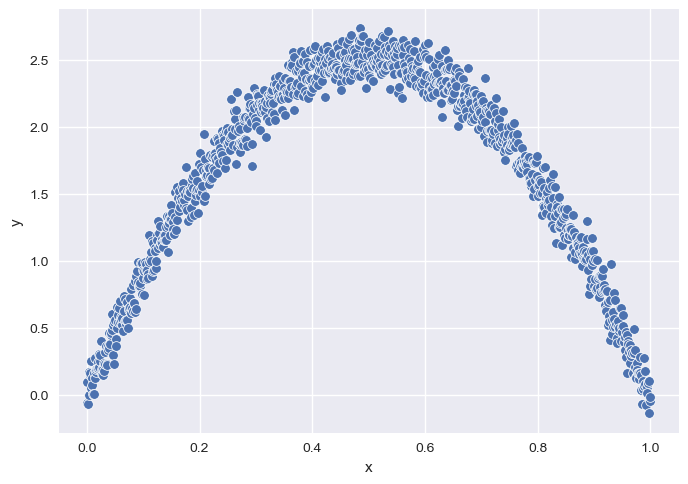

In [334]:
plt.style.use('seaborn')
sns.scatterplot(x='x', y='y', data=df)

## Criando a Árvore

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [123]:
from sklearn.tree import DecisionTreeRegressor

x= np.array(df.x).reshape(1,-1)
y = np.array(df.y).reshape(1,-1)

model = DecisionTreeRegressor(max_depth = 2, 
                             ccp_alpha=0)
reg_tree = model.fit(x.T, y.T)

In [125]:
y_pred = reg_tree.predict(x.T)

In [126]:
df['y_hat'] = y_pred.T

In [140]:
df['erro'] = df.y - df.y_hat
df

,x,y,y_hat,erro
0,0.000000,-0.059776,0.705806,-0.765582
1,0.001001,0.094685,0.705806,-0.611122
2,0.002002,-0.069536,0.705806,-0.775342
3,0.003003,0.169106,0.705806,-0.536700
4,0.004004,-0.003087,0.705806,-0.708893
...,...,...,...,...
995,0.995996,0.091812,0.330227,-0.238415
996,0.996997,0.102127,0.330227,-0.228100
997,0.997998,-0.138969,0.330227,-0.469196
998,0.998999,-0.045078,0.330227,-0.375305


## Plotando a Árvore

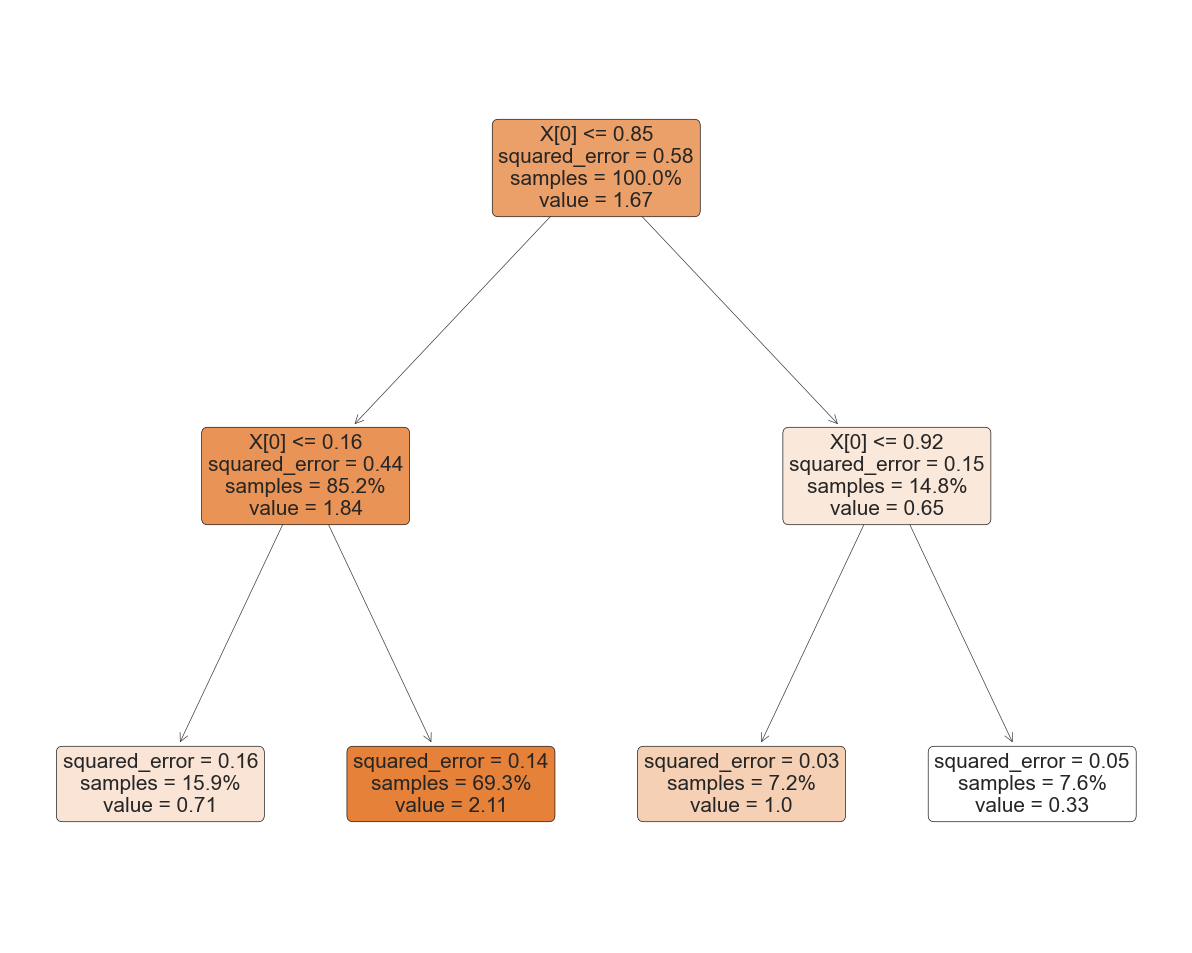

In [133]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(reg_tree, 
          filled=True, 
          rounded=True, 
          proportion=True, 
          precision=2,
          #class_names=["NO", "YES"],
          fontsize= 10, );

## Cálculo dos Indicadores de Avaliação

SQE (Sum Square Error) <br>
QME é a variância do erro

In [167]:
def indicadores (df, y, y_hat):
    n = len(df)
    SQE = sum((y - y_hat)**2)
    QME = SQE/n
    
    SST = sum((y - y.mean())**2)
    QMT = SST/n
    
    R2 = 1-SQE/SST

    print(f'SQE: {SQE}')
    print(f'QME: {QME}')
    print(f'SST: {SST}')
    print(f'QMT: {QMT}')
    print(f'R2: {R2}')

In [169]:
indicadores(df, df.y, df.y_hat)

SQE: 129.6141863120277
QME: 0.1296141863120277
SST: 577.7753135432678
QMT: 0.5777753135432677
R2: 0.7756667976740732


In [139]:
n = len(df)
SQE = sum((df.y - df.y_hat)**2)
QME = SQE/n

print(f'SQE: {SQE}')
print(f'QME: {QME}')


SQE: 129.6141863120277
QME: 0.1296141863120277


SST (Sum of Square Total) <br>
QMT - variância do Y

In [141]:
SST = sum((df.y - df.y.mean())**2)
QMT = SST/n

print(f'SST: {SST}')
print(f'QMT: {QMT}')

SST: 577.7753135432678
QMT: 0.5777753135432677


R2 : o modelo explica 77% da variância dos dados

In [142]:
R2 = 1-SQE/SST
R2

0.7756667976740732

## Análise do Modelo Pelos Gráficos

Y Observado em função de Y Predito

<AxesSubplot:xlabel='y_hat', ylabel='y'>

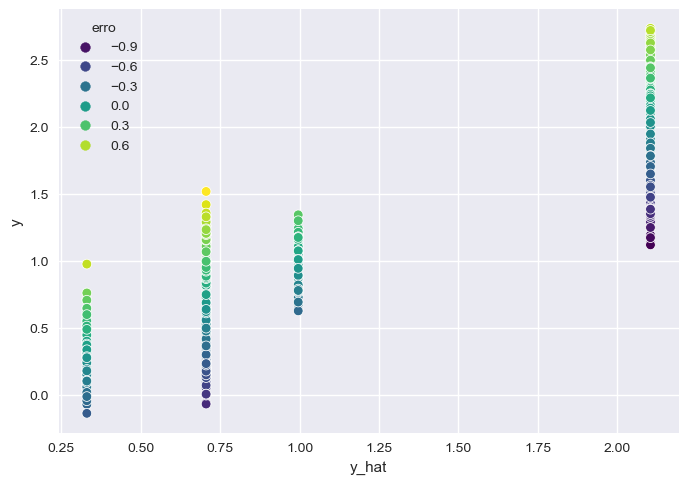

In [154]:
sns.scatterplot(x='y_hat', y='y', hue='erro', palette='viridis', data=df)

### Comparativo Valores Preditos vs Observados e Erro

<AxesSubplot:xlabel='x', ylabel='y'>

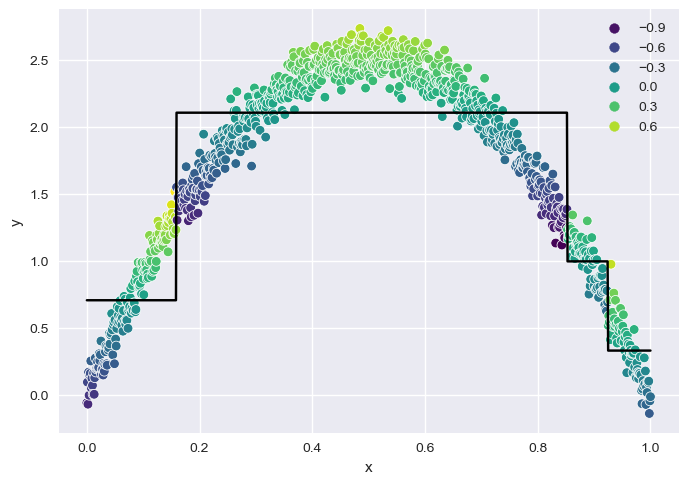

In [153]:
sns.scatterplot(x='x', y='y', hue='erro', palette='viridis', data=df)
sns.lineplot(x='x', y='y_hat', data=df, color='black')

### Gráfico de resíduos

Sobrou informação para explicar o modelo

<AxesSubplot:xlabel='x', ylabel='erro'>

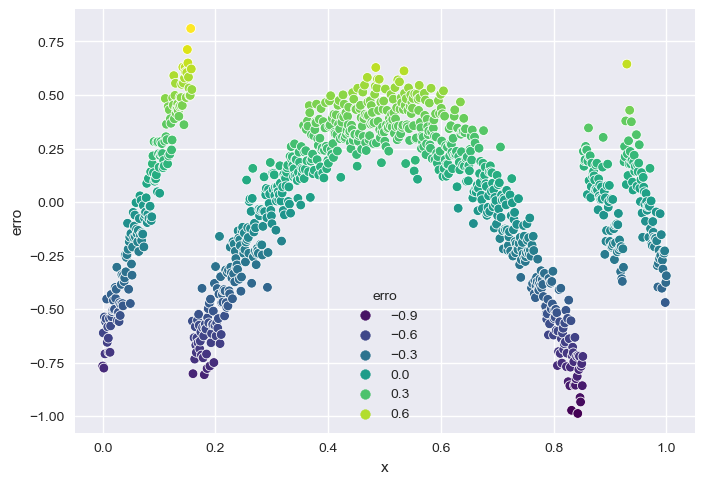

In [156]:
sns.scatterplot(x='x', y='erro', hue='erro', palette='viridis', data=df)

# Tunando a Árvore

In [171]:
model_livre = DecisionTreeRegressor(max_depth = 30, 
                                   ccp_alpha=0, 
                                   min_samples_split=2)
reg_tree_livre = model_livre.fit(x.T, y.T)

In [172]:
y_pred_livre = reg_tree_livre.predict(x.T)

df['y_hat_livre'] = y_pred_livre.T
df['erro_livre'] = df['y'] - df['y_hat_livre']

In [173]:
df

,x,y,y_hat,erro,y_hat_livre,erro_livre
0,0.000000,-0.059776,0.705806,-0.765582,-0.059776,0.0
1,0.001001,0.094685,0.705806,-0.611122,0.094685,0.0
2,0.002002,-0.069536,0.705806,-0.775342,-0.069536,0.0
3,0.003003,0.169106,0.705806,-0.536700,0.169106,0.0
4,0.004004,-0.003087,0.705806,-0.708893,-0.003087,0.0
...,...,...,...,...,...,...
995,0.995996,0.091812,0.330227,-0.238415,0.091812,0.0
996,0.996997,0.102127,0.330227,-0.228100,0.102127,0.0
997,0.997998,-0.138969,0.330227,-0.469196,-0.138969,0.0
998,0.998999,-0.045078,0.330227,-0.375305,-0.045078,0.0


In [174]:
indicadores(df, df.y, df.y_hat_livre)

SQE: 0.0006714865360908724
QME: 6.714865360908725e-07
SST: 577.7753135432678
QMT: 0.5777753135432677
R2: 0.9999988378068076


<AxesSubplot:xlabel='x', ylabel='y'>

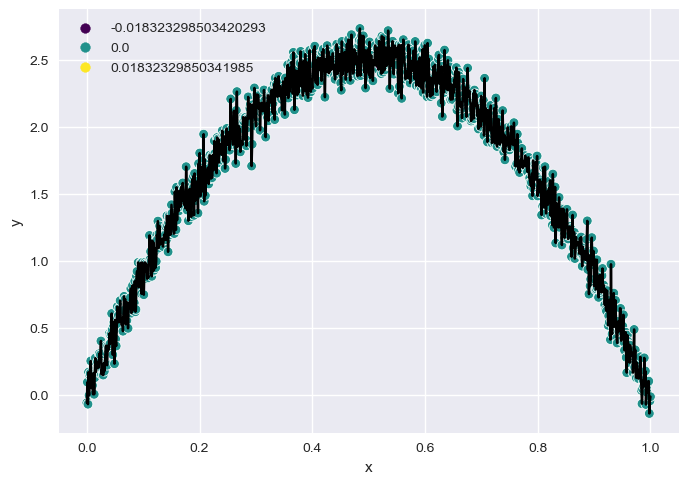

In [210]:
sns.scatterplot(x='x', y='y', hue='erro_livre', palette='viridis', data=df)
sns.lineplot(x='x', y='y_hat_livre', data=df, color='black')

<AxesSubplot:xlabel='x', ylabel='erro_livre'>

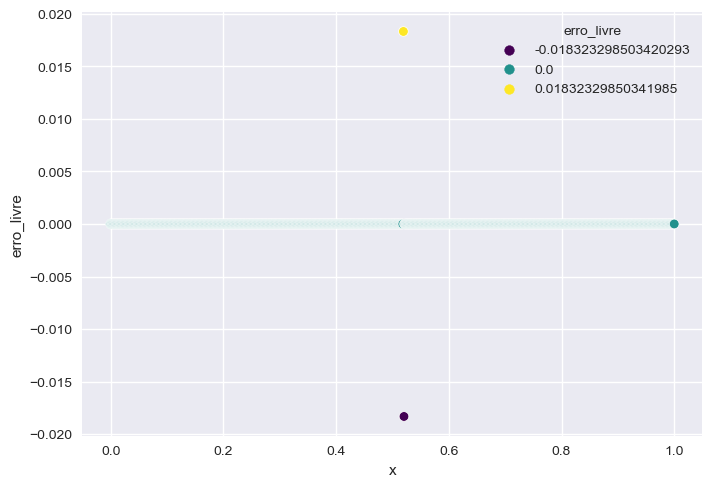

In [208]:
sns.scatterplot(x='x', y='erro_livre', hue='erro_livre', palette='viridis', data=df)

## Encontrando Melhor CCP_ALPHA

In [228]:
path = reg_tree_livre.cost_complexity_pruning_path(x.T, y.T) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = [] # create an array that we will put decision trees into

## now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    clf_dt.fit(x.T, y.T)
    clf_dts.append(clf_dt)

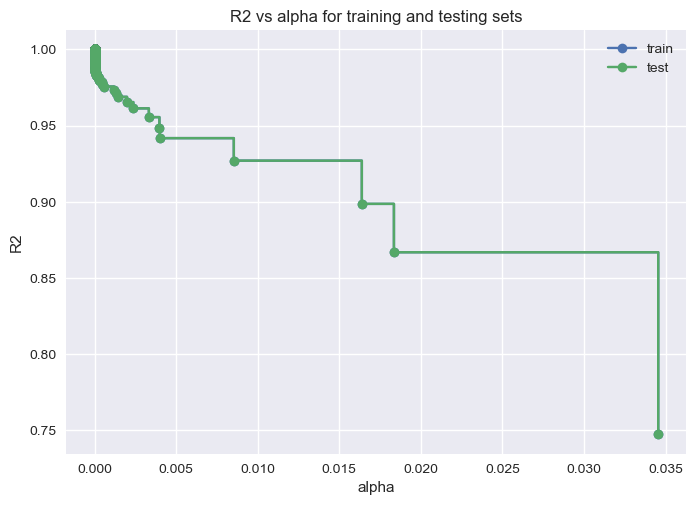

In [264]:
train_scores = [clf_dt.score(x.T, y.T) for clf_dt in clf_dts]
test_scores = [clf_dt.score(x.T, y.T) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("R2")
ax.set_title("R2 vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [265]:
ccp = pd.DataFrame()
ccp['ccp_alpha'] = ccp_alphas
ccp['test_score'] = test_scores
#ccp[ccp['test_score']== ccp['test_score'].max()]


results = ccp[(ccp['ccp_alpha'] > 0.0001)
              &
              (ccp['ccp_alpha'] < 0.005)]

results[results['test_score'] == results['test_score'].max()]

,ccp_alpha,test_score
675,0.000101,0.983502


In [266]:
results

,ccp_alpha,test_score
675,0.000101,0.983502
676,0.000115,0.983105
677,0.000123,0.982892
678,0.000138,0.982654
679,0.000165,0.982369
680,0.000210,0.982006
681,0.000231,0.981605
682,0.000261,0.981153
683,0.000266,0.980692
684,0.000278,0.980211


<AxesSubplot:xlabel='alpha'>

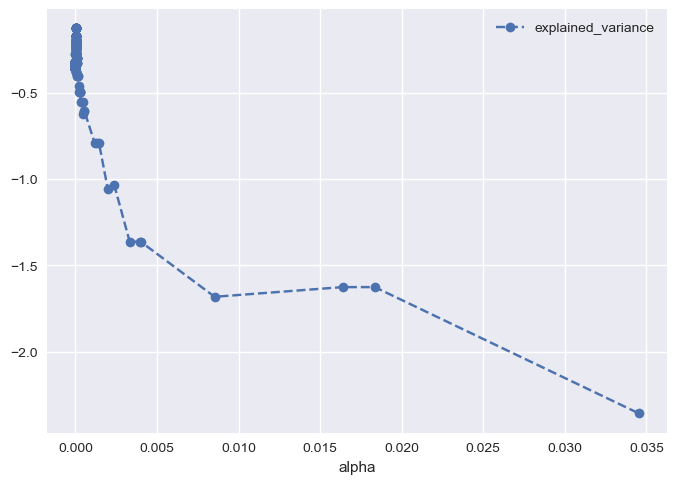

In [279]:
from sklearn.model_selection import cross_val_score # for cross validation
## create an array to store the results of each fold during cross validiation
alpha_loop_values = []

## For each candidate value for alpha, we will run 5-fold cross validation.
## Then we will store the mean and standard deviation of the scores (the accuracy) for each call
## to cross_val_score in alpha_loop_values...
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, x.T, y.T, cv=10, scoring='explained_variance')
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

## Now we can draw a graph of the means and standard deviations of the scores
## for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'explained_variance', 'std'])

alpha_results.plot(x='alpha', 
                   y='explained_variance', 
                   #yerr='std', 
                   marker='o', 
                   linestyle='--')

In [254]:
from sklearn.metrics import SCORERS

SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [280]:
results = alpha_results[(alpha_results['alpha'] > 0.00012)
              &
              (alpha_results['alpha'] < 0.005)]

results[results['explained_variance'] == results['explained_variance'].max()]

,alpha,explained_variance,std
677,0.000123,-0.403148,0.389975
678,0.000138,-0.403148,0.389975
679,0.000165,-0.403148,0.389975


In [281]:
alpha_results[alpha_results['std'] == alpha_results['std'].min()]

,alpha,explained_variance,std
661,0.000045,-0.175252,0.248259


In [326]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.model_selection import GridSearchCV

path = reg_tree_livre.cost_complexity_pruning_path(x.T, y.T)

lista_ccp_alphas = pd.DataFrame(path)

lista_alphas = {'ccp_alpha': np.array(lista_ccp_alphas.ccp_alphas)}

grid_search = GridSearchCV(reg_tree_livre, lista_alphas, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(x.T, y.T)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(ccp_alpha=0, max_depth=30),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.63916347e-12, 5.90188167e-12, 2.99069454e-11,
       4.64075622e-11, 1.37031284e-10, 7.57414685e-10, 1.00336946e-09,
       1.10529388e-09, 1.41852112e-09, 2.43059129e-09, 2.99351548e-09,
       3.66725403e-09, 4.03241883e-09, 4.60037805e-09, 5.14053822e-09,
       5....
       2.09776553e-04, 2.31280638e-04, 2.61482302e-04, 2.66112936e-04,
       2.77734129e-04, 2.94550330e-04, 3.35663829e-04, 4.40352325e-04,
       4.83045221e-04, 5.06951283e-04, 5.48744454e-04, 1.18113074e-03,
       1.29486335e-03, 1.44581828e-03, 1.98803676e-03, 2.37419043e-03,
       3.32695589e-03, 3.97402960e-03, 3.99664130e-03, 8.53533198e-03,
       1.63827115e-02, 1.83504093e-02, 3.45520795e-02, 2.15889208e-01])},
             scoring='neg_mean_squared_error')

In [327]:
best_alpha = grid_search.best_params_['ccp_alpha']
best_score = grid_search.best_score_
print("Melhor valor de ccp_alpha:", best_alpha)
print("Desempenho correspondente:", best_score)

Melhor valor de ccp_alpha: 2.1746111036504255e-05
Desempenho correspondente: -0.07161065599612393


## Modelo com Poda

In [328]:
model_poda = DecisionTreeRegressor(max_depth = 30, 
                                   ccp_alpha=0.000165, 
                                   min_samples_split=2)
reg_tree_poda = model_poda.fit(x.T, y.T)

In [329]:
y_pred_poda = reg_tree_poda.predict(x.T)

df['y_hat_poda'] = y_pred_poda.T
df['erro_poda'] = df['y'] - df['y_hat_poda']

In [330]:
df

,x,y,y_hat,erro,y_hat_livre,erro_livre,y_hat_poda,erro_poda
0,0.000000,-0.059776,0.705806,-0.765582,-0.059776,0.0,0.082361,-0.142137
1,0.001001,0.094685,0.705806,-0.611122,0.094685,0.0,0.082361,0.012324
2,0.002002,-0.069536,0.705806,-0.775342,-0.069536,0.0,0.082361,-0.151897
3,0.003003,0.169106,0.705806,-0.536700,0.169106,0.0,0.082361,0.086746
4,0.004004,-0.003087,0.705806,-0.708893,-0.003087,0.0,0.082361,-0.085448
...,...,...,...,...,...,...,...,...
995,0.995996,0.091812,0.330227,-0.238415,0.091812,0.0,0.094325,-0.002513
996,0.996997,0.102127,0.330227,-0.228100,0.102127,0.0,0.094325,0.007803
997,0.997998,-0.138969,0.330227,-0.469196,-0.138969,0.0,0.094325,-0.233293
998,0.998999,-0.045078,0.330227,-0.375305,-0.045078,0.0,0.094325,-0.139403


In [331]:
indicadores(df, df.y, df.y_hat_poda)

SQE: 10.186925749449607
QME: 0.010186925749449606
SST: 577.7753135432678
QMT: 0.5777753135432677
R2: 0.9823687071588829


<AxesSubplot:xlabel='x', ylabel='y'>

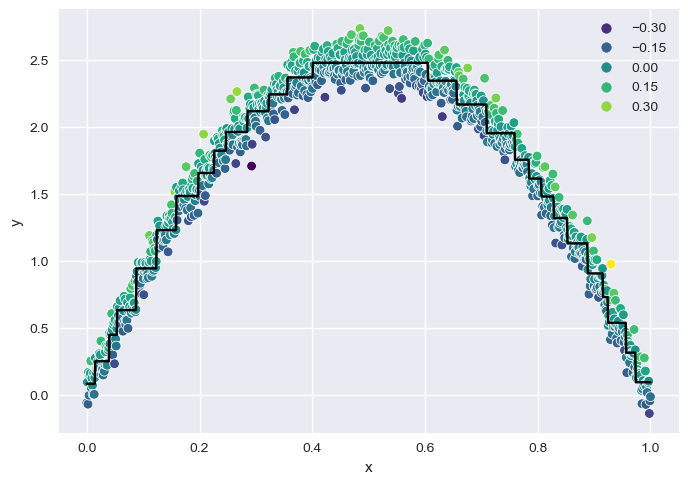

In [332]:
sns.scatterplot(x='x', y='y', hue='erro_poda', palette='viridis', data=df)
sns.lineplot(x='x', y='y_hat_poda', data=df, color='black')

<AxesSubplot:xlabel='x', ylabel='erro_poda'>

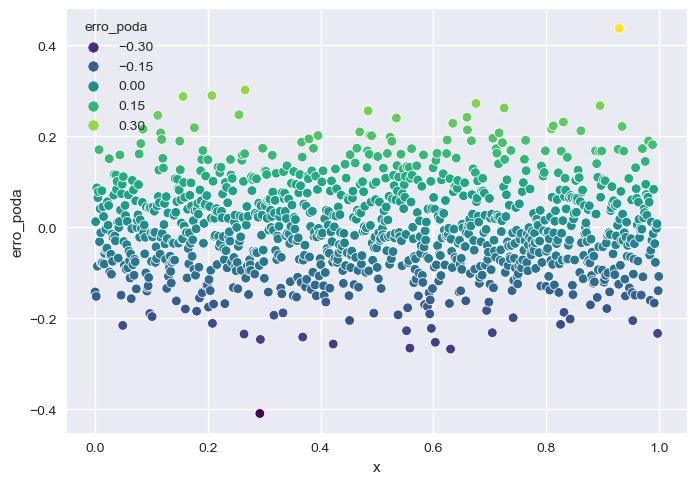

In [333]:
sns.scatterplot(x='x', y='erro_poda', hue='erro_poda', palette='viridis', data=df)